In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [2]:
reviews = pd.read_csv('reviews.csv')
reviews.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


In [3]:
reviews_cleaned = pd.read_csv('reviews_cleaned.csv')
reviews_cleaned.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need todolist remind buzz...,11,4.16.6.2,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download anydo wide use se...,8,NaN,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo


In [14]:
reviews = reviews.dropna(subset=['content'], how='all')
reviews_cleaned = reviews_cleaned.dropna(subset=['content'], how='all')
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              16786 non-null  object        
 1   userName              16786 non-null  object        
 2   userImage             16786 non-null  object        
 3   content               16786 non-null  object        
 4   thumbsUpCount         16786 non-null  int64         
 5   reviewCreatedVersion  14429 non-null  object        
 6   at                    16786 non-null  datetime64[ns]
 7   replyContent          9167 non-null   object        
 8   repliedAt             9167 non-null   datetime64[ns]
 9   appVersion            14429 non-null  object        
 10  sortOrder             16786 non-null  object        
 11  appId                 16786 non-null  object        
 12  clean_content         16695 non-null  object        
dtypes: datetime64[ns](2),

In [15]:
reviews['clean_content'] = reviews_cleaned['content']
reviews.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,clean_content
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,recur task everi day need todolist remind buzz...
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,NaN,most_relevant,com.anydo,instead shop around download anydo wide use se...
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,everi blue app ask updat acct email everyth ta...
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,NaN,most_relevant,com.anydo,terribl updat app use perfect plan certain tas...
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,app deceivingli terribl realli nice design fea...


In [16]:
reviews[['at', 'repliedAt']] = reviews[['at', 'repliedAt']].apply(pd.to_datetime)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16786 entries, 0 to 16786
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              16786 non-null  object        
 1   userName              16786 non-null  object        
 2   userImage             16786 non-null  object        
 3   content               16786 non-null  object        
 4   thumbsUpCount         16786 non-null  int64         
 5   reviewCreatedVersion  14429 non-null  object        
 6   at                    16786 non-null  datetime64[ns]
 7   replyContent          9167 non-null   object        
 8   repliedAt             9167 non-null   datetime64[ns]
 9   appVersion            14429 non-null  object        
 10  sortOrder             16786 non-null  object        
 11  appId                 16786 non-null  object        
 12  clean_content         16695 non-null  object        
dtypes: datetime64[ns](2),

WordCloud

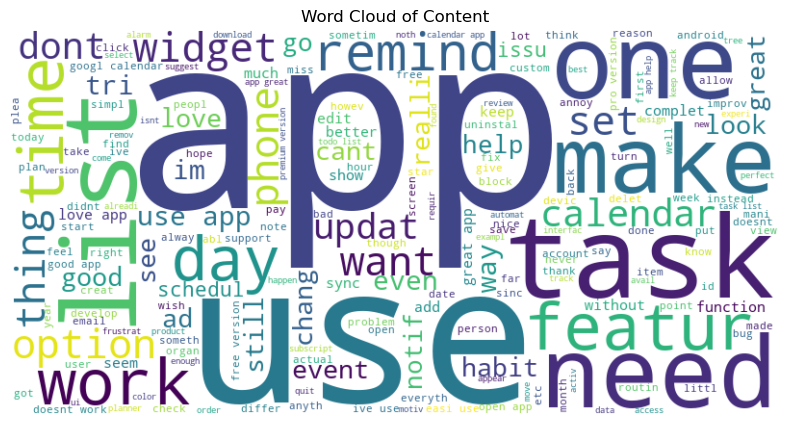

In [19]:
all_content = ' '.join(reviews['clean_content'].dropna())

wc = WordCloud(width=800, height=400, background_color='white').generate(all_content)


plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Content')
plt.show()

In [20]:
from collections import Counter

In [21]:
all_words = all_content.split()
all_words = Counter(all_words)

top_words = all_words.most_common(10)
top_words = pd.DataFrame(top_words, columns=['word', 'freq'])
top_words = top_words.sort_values(by='freq', ascending=True)
top_words

,word,freq
9,day,3067
8,calendar,3184
7,would,3189
6,list,3363
5,work,3696
4,time,4061
3,like,4092
2,task,6220
1,use,6845
0,app,16238


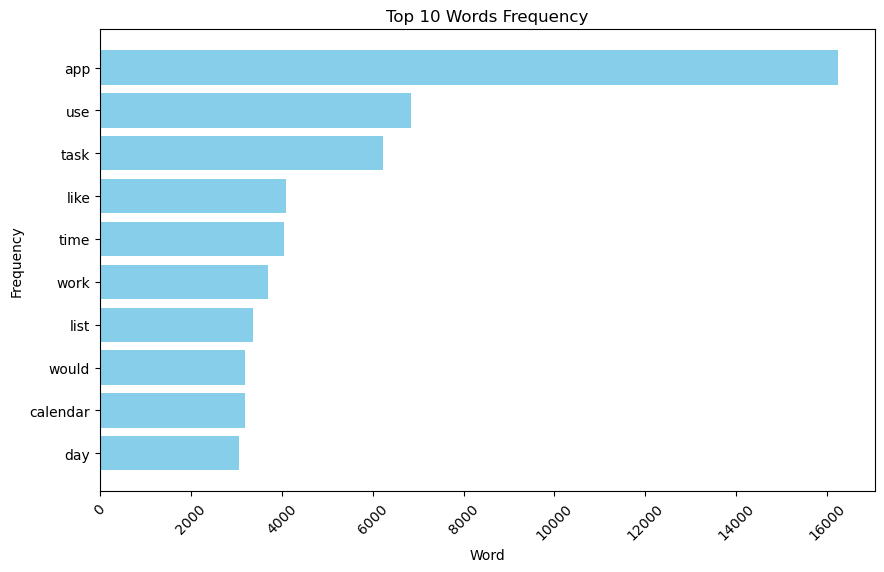

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['freq'], color='skyblue')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Words Frequency')
plt.xticks(rotation=45)
plt.show()

Sentiment Analysis

In [24]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
def sent_textblob(text):

    p = TextBlob(text).sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    
    return sent



In [26]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_vader(text):

    p = analyzer.polarity_scores(text)['compound']
    
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    
    return sent

In [34]:
# Sentiment Analysis with TextBlob
reviews['sentiment_textblob'] = reviews['clean_content'].dropna().apply(sent_textblob)
# Sentiment Analysis with Vader
reviews['sentiment_vader'] = reviews['clean_content'].dropna().apply(get_sentiment_vader)
# Sentiment Analysis with TextBlob

print(reviews['sentiment_textblob'].value_counts())
# Sentiment Analysis with Vader
print(reviews['sentiment_vader'].value_counts())

sentiment_textblob
Positive    10660
Neutral      3909
Negative     2126
Name: count, dtype: int64
sentiment_vader
Positive    11293
Negative     3076
Neutral      2326
Name: count, dtype: int64


In [35]:
reviews.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,clean_content,sentiment_textblob,sentiment_vader
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,2020-07-22 13:13:00,Our team will be happy to look into it for you...,2020-07-23 16:32:00,4.16.6.2,most_relevant,com.anydo,recur task everi day need todolist remind buzz...,Negative,Negative
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,2020-12-08 06:24:00,We are not aware of any issues with randomized...,2020-12-10 09:38:00,NaN,most_relevant,com.anydo,instead shop around download anydo wide use se...,Negative,Positive
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,2021-07-09 13:51:00,Sorry to hear that! It sounds like you might h...,2021-07-11 11:16:00,5.11.1.2,most_relevant,com.anydo,everi blue app ask updat acct email everyth ta...,Positive,Negative
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,2020-11-16 01:50:00,Please note that the tasks in your tasks view ...,2020-11-17 09:31:00,NaN,most_relevant,com.anydo,terribl updat app use perfect plan certain tas...,Positive,Positive
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,2019-01-31 16:19:00,"Hi Ryan, it sounds like you are describing our...",2019-02-05 11:52:00,4.14.0.4,most_relevant,com.anydo,app deceivingli terribl realli nice design fea...,Positive,Positive


In [36]:
reviews.tail()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,clean_content,sentiment_textblob,sentiment_vader
16782,e9cebff8-82ad-4191-b196-127a65e9036d,Alexandra Grafwallner,https://play-lh.googleusercontent.com/a-/ALV-U...,Excellent app,0,6.1.4,2023-07-05 02:08:00,NaN,NaT,6.1.4,newest,com.appxy.planner,excel app,Neutral,Positive
16783,ab74c21c-3587-4393-a53d-4cb55f3e3c9b,Ljubica Pejic,https://play-lh.googleusercontent.com/a-/ALV-U...,I love it. Easy to use. Make my life organize....,9,6.1.4,2023-06-29 15:27:00,NaN,NaT,6.1.4,newest,com.appxy.planner,love easi use make life organ love way put pho...,Positive,Positive
16784,0062b15d-6e4d-4f0a-9ea6-ef9b9420d923,Kamiyah Dorsey,https://play-lh.googleusercontent.com/a/ACg8oc...,I love how I could make plans and check the ap...,0,6.1.3,2023-06-28 01:04:00,NaN,NaT,6.1.3,newest,com.appxy.planner,love could make plan check app almost everyday...,Positive,Positive
16785,85318bf2-7ca0-4d5e-8cb2-f0f18c813e4d,Keturah Pender,https://play-lh.googleusercontent.com/a/ACg8oc...,Exactly what I needed!!!,0,6.1.3,2023-06-23 13:14:00,NaN,NaT,6.1.3,newest,com.appxy.planner,exactli need,Neutral,Neutral
16786,8e2deadd-1a6a-4817-89dc-4bd9a198332c,Bhagwan Singh Virik,https://play-lh.googleusercontent.com/a-/ALV-U...,Very good 👍,0,6.1.3,2023-06-21 03:16:00,NaN,NaT,6.1.3,newest,com.appxy.planner,good,Positive,Positive


In [37]:
import plotly.express as px

In [42]:
dfx = reviews[['at', 'sentiment_textblob']]
dfx['at'] = dfx['at'].dt.month
dfx=dfx.rename(columns={'at':'Months', 'sentiment_textblob': 'Sentiment'})
dfx=dfx.groupby(['Months','Sentiment']).size().reset_index(name='Reviews')
fig4 = px.bar(dfx, x="Months", y="Reviews", color="Sentiment", title="Monthwise Sentiment Analysis using TextBlob")
fig4.show()

C:\Users\ARITRA\AppData\Local\Temp\ipykernel_11956\1873946216.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
dfx = reviews[['at', 'sentiment_vader']]
dfx['at'] = dfx['at'].dt.month
dfx=dfx.rename(columns={'at':'Months', 'sentiment_vader': 'Sentiment'})
dfx=dfx.groupby(['Months','Sentiment']).size().reset_index(name='Reviews')
fig4 = px.bar(dfx, x="Months", y="Reviews", color="Sentiment", title="Monthwise Sentiment Analysis using VaderSentiment")
fig4.show()

C:\Users\ARITRA\AppData\Local\Temp\ipykernel_11956\3173445007.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
reviews.to_csv('reviews_sentiment.csv', index=False)